## Topic Words

1. **hunter-biden**
2. **pro-vote**
3. **covid-stats**
4. **vp-candidates**
5. **debate**
6. **trump-covid-rally**
7. **past-candidates**
8. **polls**
9. **negative-campaign-ads**
11. **foreign-affairs**
12. **racism**
13. **truth & lies**
14. **covid-restrictions**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_users = pd.read_csv("../data/user_stats.csv")
print(df_users.shape)
df_users.head(3)

(62711, 3)


,user_id,bot_proba,verified
0,2820503362,3.51,False
1,1312487180258820096,0.68,False
2,2335763630,4.03,False


In [3]:
df_tweets = pd.read_pickle("pickle/tweet_topics.pick")
print(df_tweets.shape)
df_tweets.head(2)

(363310, 13)


,id,date,time,user_id,username,hashtags,trump,biden,original,tweet,num_tokens,tweet_topic,topic
4,1313630112500326404,2020-10-06,23:59:59,5510112,spaceweasel,[],False,True,Biden raises eyebrows after telling 'these bea...,raise joebiden lady young beautiful eyebrow da...,10,11,racism
6,1313630112202489858,2020-10-06,23:59:59,2161846130,c_mackiii,[],True,True,"Post-debate and hospitalization, Trump falls f...",joebiden yahoo fall donaldtrump national poll ...,8,8,polls


In [4]:
user_probas = dict(zip(df_users.user_id, df_users.bot_proba))
user_verifs = dict(zip(df_users.user_id, df_users.verified))
df_tweets['bot_proba'] = df_tweets['user_id'].map(user_probas)
df_tweets['verified'] = df_tweets['user_id'].map(user_verifs)

df_tweets.head(2)

,id,date,time,user_id,username,hashtags,trump,biden,original,tweet,num_tokens,tweet_topic,topic,bot_proba,verified
4,1313630112500326404,2020-10-06,23:59:59,5510112,spaceweasel,[],False,True,Biden raises eyebrows after telling 'these bea...,raise joebiden lady young beautiful eyebrow da...,10,11,racism,NaN,NaN
6,1313630112202489858,2020-10-06,23:59:59,2161846130,c_mackiii,[],True,True,"Post-debate and hospitalization, Trump falls f...",joebiden yahoo fall donaldtrump national poll ...,8,8,polls,NaN,NaN


In [8]:
df_tweets['bot_proba'] = df_tweets.bot_proba.astype(float)
df_tweets.to_pickle("pickle/tweet_topics_bots.pickle")

(array([7535., 4761., 2763., 2169., 1614., 1337., 1115.,  886., 1013.,
         894.]),
 array([ 0.11 , 10.059, 20.008, 29.957, 39.906, 49.855, 59.804, 69.753,
        79.702, 89.651, 99.6  ]),
 <BarContainer object of 10 artists>)

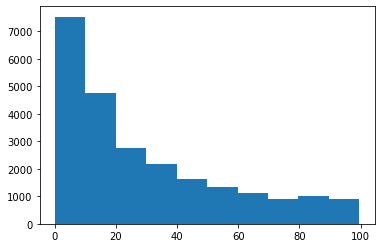

In [6]:
import matplotlib.pyplot as plt


mask = df_tweets.bot_proba.astype(float) > 0
df_probas = df_tweets[mask]
plt.hist(df_probas.bot_proba)

Text(0.5, 1.0, 'Bot probabilities for tweets in each topic')

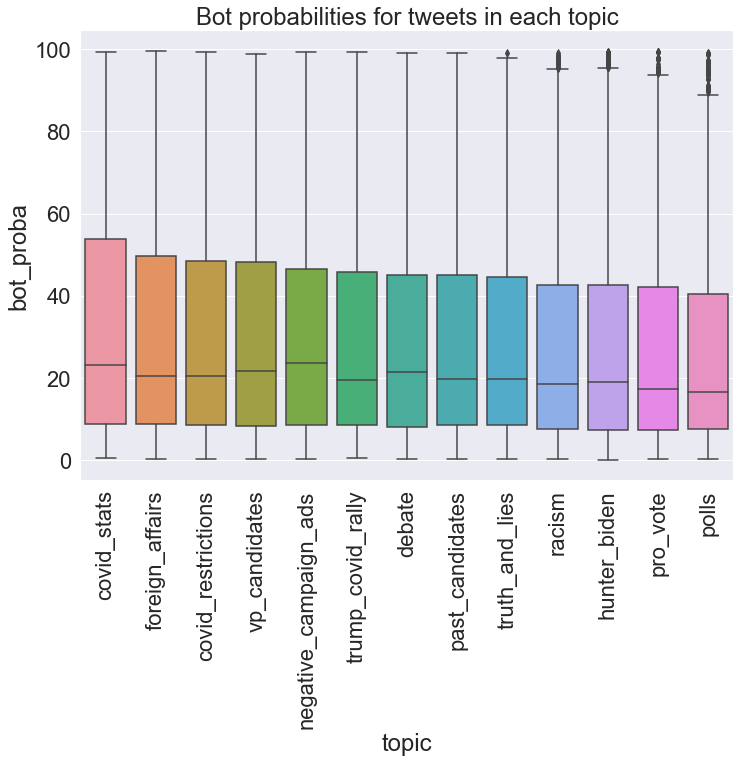

In [7]:
import seaborn as sns

col_order = [
    'covid_stats',
    'foreign_affairs',
    'covid_restrictions',
    'vp_candidates',
    'negative_campaign_ads',
    'trump_covid_rally',
    'debate',
    'past_candidates',
    'truth_and_lies',
    'racism',
    'hunter_biden',
    'pro_vote',
    'polls',
]
sns.set(font_scale=2,rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='topic', y="bot_proba", data=df_tweets[['topic', 'bot_proba']], order=col_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Bot probabilities for tweets in each topic")
